In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.metrics import r2_score




In [12]:

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target 
print(df.info(), "\nMissing Values:\n", df.isnull().sum(), "\nSummary Stats:\n", df.describe())
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None 
Missing Values:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64 
Summary Stats:
                 age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790

In [3]:
print(df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

TASK 2 

In [13]:

model = LinearRegression()
model.fit(X_train, y_train)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Model Intercept: 151.34560453985995


In [15]:

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R² Score on Test Set: {r2:.4f}")


R² Score on Test Set: 0.4526


task 3

In [16]:


rfe = RFE(estimator=model, n_features_to_select=1)  
rfe.fit(X_train, y_train)
rfe_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print(rfe_ranking)


  Feature  Ranking
2     bmi        1
8      s5        2
4      s1        3
5      s2        4
3      bp        5
1     sex        6
7      s4        7
6      s3        8
9      s6        9
0     age       10


In [17]:
#3.2
feature_elimination_order = []
for n_features in range(X_train.shape[1], 0, -1):
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    selected_features = X_train.columns[rfe.support_].tolist()
    feature_elimination_order.append((n_features, selected_features))
elimination_df = pd.DataFrame(feature_elimination_order, columns=['Num Features', 'Selected Features'])

print(elimination_df)



   Num Features                            Selected Features
0            10  [age, sex, bmi, bp, s1, s2, s3, s4, s5, s6]
1             9       [sex, bmi, bp, s1, s2, s3, s4, s5, s6]
2             8           [sex, bmi, bp, s1, s2, s3, s4, s5]
3             7               [sex, bmi, bp, s1, s2, s4, s5]
4             6                   [sex, bmi, bp, s1, s2, s5]
5             5                        [bmi, bp, s1, s2, s5]
6             4                            [bmi, s1, s2, s5]
7             3                                [bmi, s1, s5]
8             2                                    [bmi, s5]
9             1                                        [bmi]


In [ ]:


r2_scores = []
for n_features in range(X_train.shape[1], 0, -1):
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    y_pred = rfe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append((n_features, r2))
r2_scores_df = pd.DataFrame(r2_scores, columns=['Num Features', 'R² Score'])

print(r2_scores_df)


   Num Features  R² Score
0            10  0.452603
1             9  0.458659
2             8  0.455901
3             7  0.458255
4             6  0.462777
5             5  0.438201
6             4  0.446404
7             3  0.445095
8             2  0.452293
9             1  0.233350


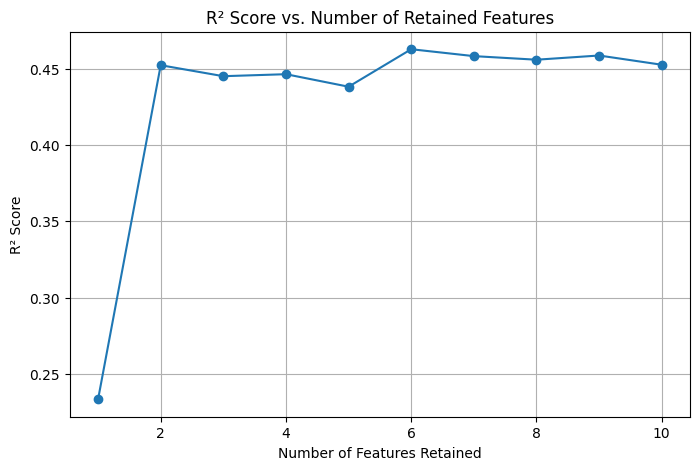

In [24]:
import matplotlib.pyplot as plt


num_features_list = r2_scores_df['Num Features']
r2_values = r2_scores_df['R² Score']

plt.figure(figsize=(8, 5))
plt.plot(num_features_list, r2_values, marker='o', linestyle='-')
plt.xlabel("Number of Features Retained")
plt.ylabel("R² Score")
plt.title("R² Score vs. Number of Retained Features")
plt.grid()
plt.show()


In [25]:

r2_diffs = np.diff(r2_scores_df['R² Score'])

optimal_features_index = np.where(r2_diffs < 0.01)[0][0] if np.any(r2_diffs < 0.01) else len(r2_scores_df) - 1
optimal_num_features = r2_scores_df.iloc[optimal_features_index]['Num Features']

optimal_features = elimination_df.iloc[optimal_features_index]['Selected Features']

print(f"Optimal number of features: {optimal_num_features}")
print(f"Selected Features: {optimal_features}")


Optimal number of features: 10.0
Selected Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


task 4

In [ ]:

coefficients_table = pd.DataFrame(index=X_train.columns)

for n_features in range(X_train.shape[1], 0, -1):
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    
   
    coeffs = pd.Series(rfe.estimator_.coef_, index=X_train.columns[rfe.support_])
    coefficients_table[f"{n_features}_features"] = coeffs


coefficients_table = coefficients_table.fillna(0)


print("Feature Coefficients at Each RFE Iteration:")
print(coefficients_table.to_string())

coefficients_table.to_csv("feature_coefficients_rfe.csv", index=True)
print("\nFeature Coefficients table saved as 'feature_coefficients_rfe.csv'")



Feature Coefficients at Each RFE Iteration:
     10_features  9_features  8_features  7_features  6_features  5_features  4_features  3_features  2_features  1_features
age    37.904021    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
sex  -241.964362 -236.649588 -233.754686 -235.364224 -215.267423    0.000000    0.000000    0.000000    0.000000    0.000000
bmi   542.428759  542.799508  550.744365  551.866448  557.314167  597.892739  691.460102  737.685594  732.109021  998.577689
bp    347.703844  354.211438  363.791753  362.356114  350.178667  306.647913    0.000000    0.000000    0.000000    0.000000
s1   -931.488846 -936.350589 -947.823133 -660.643160 -851.515734 -655.560612 -592.977874 -228.339889    0.000000    0.000000
s2    518.062277  528.796592  541.585796  343.348089  591.093315  409.622184  362.950323    0.000000    0.000000    0.000000
s3    163.419983  167.800414  172.250588    0.000000    0.000000    0.000000    0

In [34]:
optimal_features_coeffs = coefficients_table["10_features"].sort_values(key=abs, ascending=False)
print("\nTop 3 Most Important Features (Using All 10 Features):")
print(optimal_features_coeffs.head(3))
for feature, coefficient in optimal_features_coeffs.head(3).items():
    print(f"\nFeature: {feature}, Coefficient: {coefficient:.3f}")
    print(f"Interpretation: A 1-unit increase in {feature} leads to a {coefficient:.3f} change in diabetes progression, holding other factors constant.")



Top 3 Most Important Features (Using All 10 Features):
s1    -931.488846
s5     736.198859
bmi    542.428759
Name: 10_features, dtype: float64

Feature: s1, Coefficient: -931.489
Interpretation: A 1-unit increase in s1 leads to a -931.489 change in diabetes progression, holding other factors constant.

Feature: s5, Coefficient: 736.199
Interpretation: A 1-unit increase in s5 leads to a 736.199 change in diabetes progression, holding other factors constant.

Feature: bmi, Coefficient: 542.429
Interpretation: A 1-unit increase in bmi leads to a 542.429 change in diabetes progression, holding other factors constant.


In [37]:

initial_ranking = pd.Series(model.coef_, index=X_train.columns).sort_values(key=abs, ascending=False)
final_features = optimal_features_coeffs.index

comparison_df = pd.DataFrame({"Initial Ranking": initial_ranking.index[:len(final_features)], 
                              "Final Features": final_features})
print("\nComparison of Initial Feature Ranking vs Final Selected Features:")
print(comparison_df.to_string())






Comparison of Initial Feature Ranking vs Final Selected Features:
  Initial Ranking Final Features
0              s1             s1
1              s5             s5
2             bmi            bmi
3              s2             s2
4              bp             bp
5              s4             s4
6             sex            sex
7              s3             s3
8              s6             s6
9             age            age


Task 5 

What did you learn about feature selection using RFE?
what i have learned is , it removes the least important features step by step . 

but as we have use 0.01 threshold for r2 , we have retained all 10 features but we dont use this , the important features generally are only 6 as we can see the the r2 is peaked when the model has only 6 features 

and the key point i understood in rfe is , its not always about deleting the features because as we saw if we further eliminate the features , we can see the performance loss and the same way it helped to identify what are important features like s1,s5 and bmi


2. 
rfe retained all 10 features because each contributed enough to justify keeping them. but lasso might have foreced some features to zero , which effect the model perforance ,by reducing the features 

3. the strongest feature is bmi , s5 and s1 
BP has oderate importance 
all 10 features are important enough to be kept as diabetes progression is influenced by multiple factors working together, not just one.
